In [1]:
%load_ext watermark
%watermark

2020-10-05T19:34:31+02:00

CPython 3.8.5
IPython 7.18.1

compiler   : MSC v.1916 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 60 Stepping 3, GenuineIntel
CPU cores  : 8
interpreter: 64bit


In [2]:
import esda
import libpysal
import matplotlib
import matplotlib_scalebar
from matplotlib_scalebar.scalebar import ScaleBar
import numpy
import spaghetti
import splot

%matplotlib inline
%watermark -w
%watermark -iv

watermark 2.0.2
esda                2.3.1
spaghetti           1.5.0
matplotlib_scalebar 0.6.2
numpy               1.19.1
libpysal            4.3.0
splot               1.1.3
matplotlib          3.3.2



In [3]:
from splot.esda import moran_scatterplot, lisa_cluster, plot_moran

In [4]:
try:
    from IPython.display import set_matplotlib_formats
    set_matplotlib_formats("retina")
except ImportError:
    pass

In [5]:
def calc_moran(net, pp_name, w):
    """Calculate a Moran's I statistic based on network arcs."""
    # Compute the counts
    pointpat = net.pointpatterns[pp_name]
    counts = net.count_per_link(pointpat.obs_to_arc, graph=False)
    # Build the y vector
    arcs = w.neighbors.keys()
    y = [counts[a] if a in counts.keys() else 0. for i, a in enumerate(arcs)]
    # Moran's I
    moran = esda.moran.Moran(y, w, permutations=99)
    return moran, y

---------------

In [6]:
ntw = spaghetti.Network(in_data=libpysal.examples.get_path("streets.shp"))

In [7]:
_, arc_df = spaghetti.element_as_gdf(ntw, vertices=True, arcs=True)
arc_df.head()

,id,geometry,comp_label
0,"(0, 1)","LINESTRING (728368.048 877125.895, 728368.139 ...",0
1,"(0, 2)","LINESTRING (728368.048 877125.895, 728367.458 ...",0
2,"(1, 110)","LINESTRING (728368.139 877023.272, 728612.255 ...",0
3,"(1, 127)","LINESTRING (728368.139 877023.272, 727708.140 ...",0
4,"(1, 213)","LINESTRING (728368.139 877023.272, 728368.729 ...",0


In [16]:
pp_name = "crimes"
pp_shp = './data/geodanet_cluster.shp' #libpysal.examples.get_path("%s.shp" % pp_name)
ntw.snapobservations(pp_shp, pp_name, attribute=True)
pp_df = spaghetti.element_as_gdf(ntw, pp_name=pp_name)
pp_df.head()

,id,geometry,comp_label
0,0,POINT (725935.071 878400.214),0
1,1,POINT (727210.276 878067.073),0
2,2,POINT (726651.286 878045.404),0
3,3,POINT (726995.360 877914.403),0
4,4,POINT (726965.193 878346.289),0


In [17]:
moran_ntwwn, yaxis_ntwwn = calc_moran(ntw, pp_name, ntw.w_network)

<AxesSubplot:>

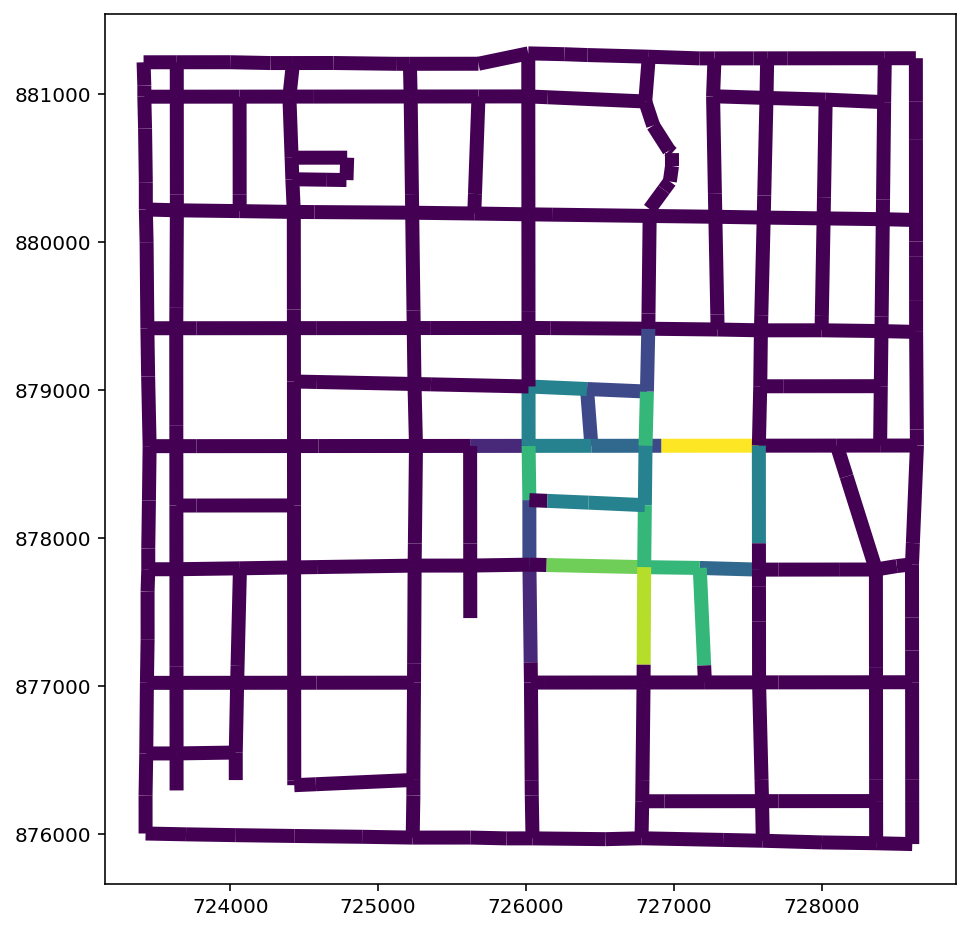

In [18]:
arc_df['n'] = yaxis_ntwwn
arc_df.plot(column='n', lw=7, figsize=(8,8))

In [19]:
moran_loc_ntwwn = esda.moran.Moran_Local(yaxis_ntwwn, ntw.w_network)

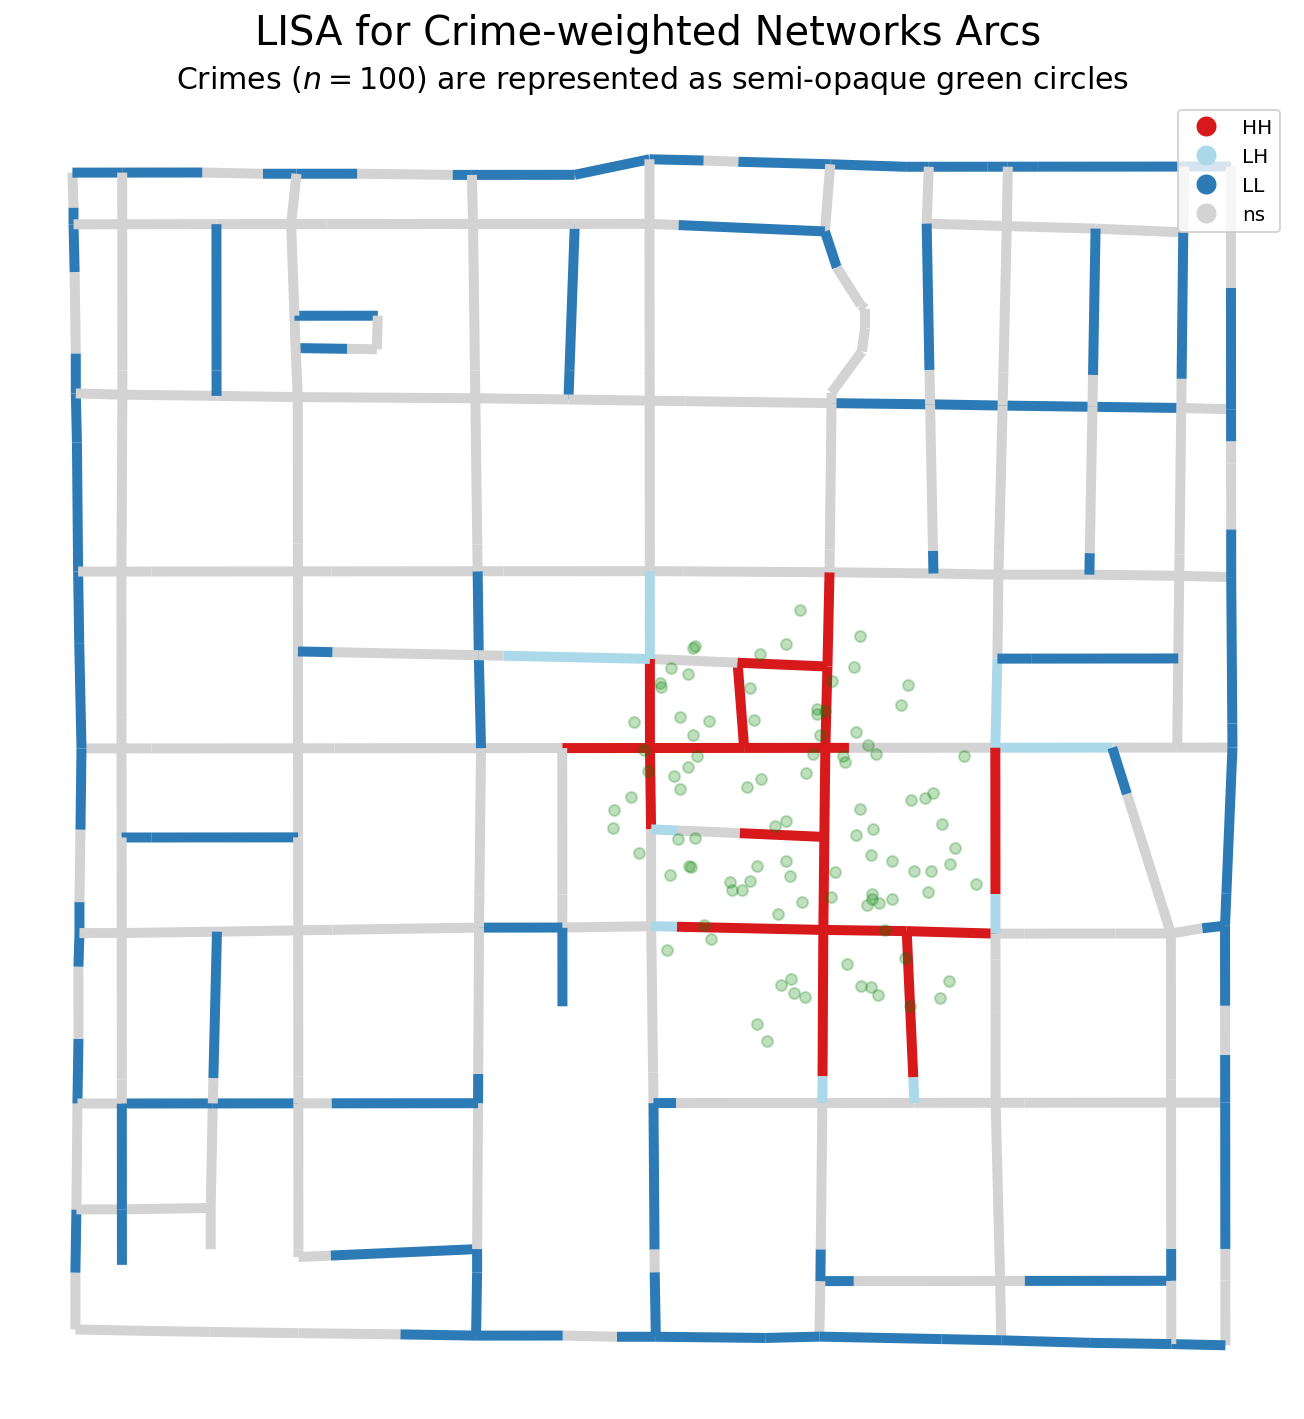

In [20]:
p = 0.05

f, ax = lisa_cluster(moran_loc_ntwwn, arc_df, p=p, figsize=(12,12), lw=5, zorder=0)
pp_df.plot(ax=ax, zorder=1, alpha=.25, color="g", markersize=30)
suptitle = "LISA for Crime-weighted Networks Arcs"
matplotlib.pyplot.suptitle(suptitle, fontsize=20, x=.51, y=.93)
subtitle = "Crimes ($n=%s$) are represented as semi-opaque green circles"
matplotlib.pyplot.title(subtitle % pp_df.shape[0], fontsize=15);

In [21]:
def plot_counts_on_arcs(net, pp_shp, pp_name):
    net.snapobservations(pp_shp, pp_name, attribute=True)
    pp_df = spaghetti.element_as_gdf(net, pp_name=pp_name)
    moran_ntwwn, yaxis_ntwwn = calc_moran(net, pp_name, net.w_network)
    _, arc_df = spaghetti.element_as_gdf(net, vertices=True, arcs=True)
    arc_df['n'] = yaxis_ntwwn
    arc_df.plot(column='n', lw=7, figsize=(8,8))

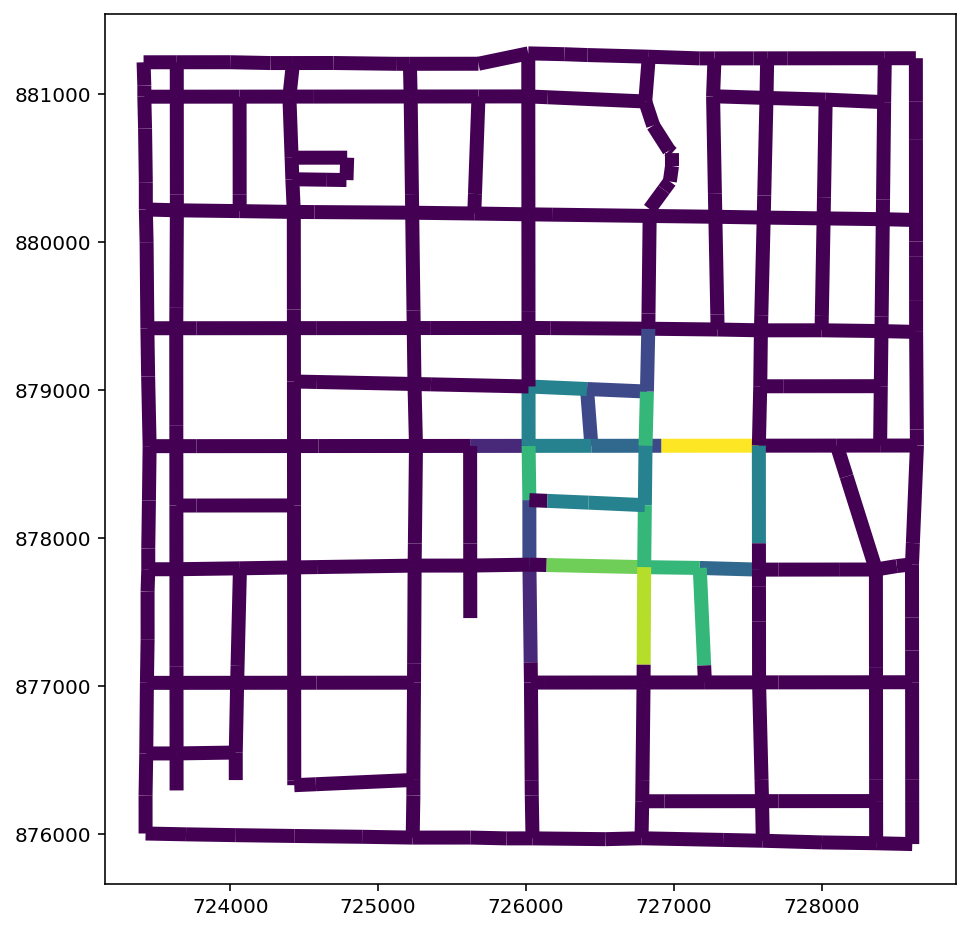

In [22]:
plot_counts_on_arcs(ntw, pp_shp, pp_name)

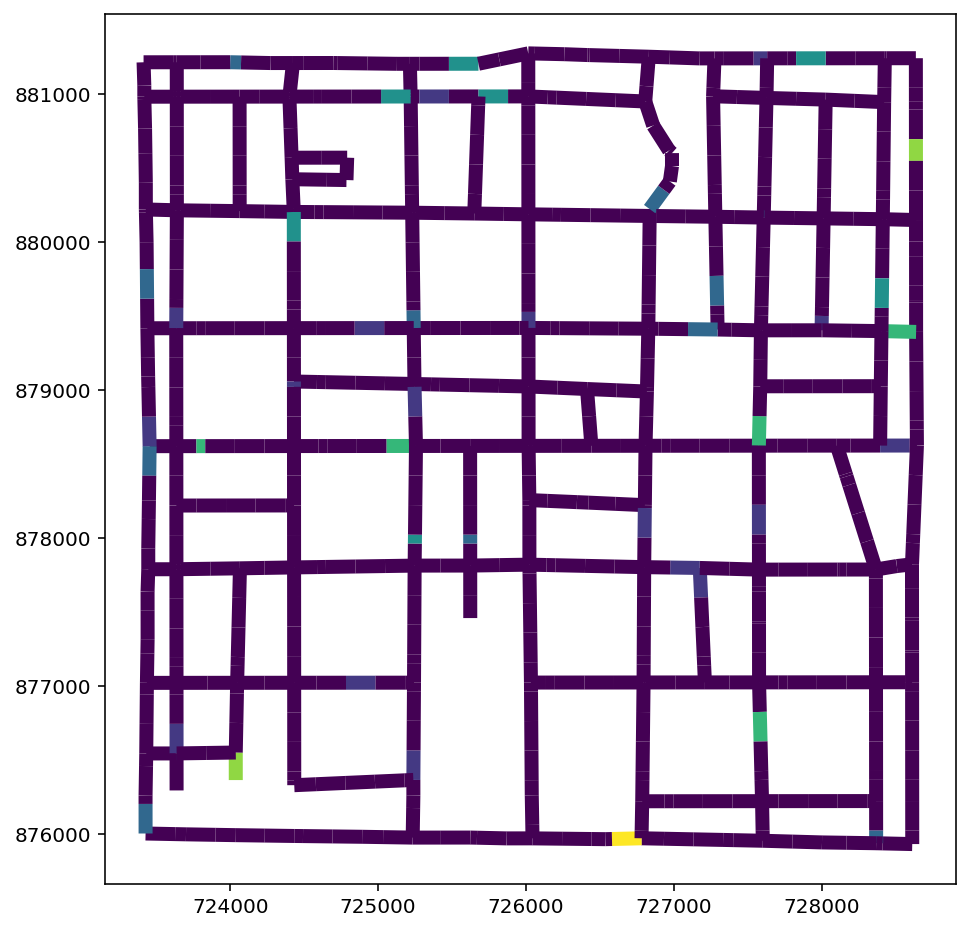

In [23]:
n200 = ntw.split_arcs(200.0)
plot_counts_on_arcs(n200, pp_shp, pp_name)